<a href="https://colab.research.google.com/github/mbraddy/CAP4630-AI/blob/master/hw4/CAP4630_Braddy_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4 Summary of Things I Learned In This Class - Michael Braddy

**0. General concepts (for instance, what is artificial intelligence, machine learning, deep learning)**

I'd define Artifical intelligence as a very broad term. I believe any solution to any problem that is formulated in a way that allows it to be solved by a computer is considered Artificial Intelligence and AI is then subdivided into categories of those problems. For example, A* is a solution to a Pathfinding problem and Pathfinding is a branch of Artificial Intelligence. Or perhaps more applicable to this class, Convolutional Neural Networks are a solution to a Machine Learning problem which is also a branch of Artificial Intelligence.

Machine Learning itself is a method of data analysis based on the idea that a computer is capable of identifying patterns and making decisions based on those patterns with very little human intervention. One of the subsets of machine learning that we covered in this class is Deep Learning.

Deep Learning can then be defined as a method of teaching a computer on how to think and process unstructured inputs by breaking down an input layer by layer. It establishes a network of layers that each process the output of the previous layer and examine finer and finer details until the desired output is reached. Learning this way does require extensive training and self regulation of the loss and accuracy of the neural network model.

**1. Building a model (for instance, here you can talk about the structure of a convent, what it components are etc.)**

The neural network itself is called a model. These models can be structured in several ways, (such as functional or sequential) but the way we did it in this class was through sequential models.

A sequential model is a neural network model that allows you to build sequential layers to handle one source of input. Similarly to a aqueous filter, you input your initial type of data and each layer that it passes through removes something. The difference is that the neural net then processes what is relevant to identifying what the original input is at each layer until there is nothing left. This allows the model to then match the components of the input to a known dataset in order for it to determine/guess what the input was originally by labeling the data.

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

# Loading example dataset [Code taken from HW1]
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

# Constructing the model - Define the Structure then add the layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**2. Comping a model (for instance, you can talk here about optimizers, learning rate etc.)**


After constructing the model we then compile the model. When compiling the model we need to define the optimizer, the loss function, and define the metrics that we care about examining. In this case, that metric is accuracy.

The loss function itself is a function that maps how well our specific algorithm maps to the trained data. If the loss gets too high then we know that the algorithm is deviating greatly from our desired results and that the predictions of the neural net are going to be way off.

In order to keep the loss function useful, we utilize a tuning parameter called the learning rate. This allows us to limit the step size each iteration so that we don't over-shoot the minima of the loss function.

The Optimizer itself ties the model to the loss function by looking at the loss and then adjusting the weights (or parameters) of our models in order to minimize the loss. This guides the model in the right direction towards minimizing the loss and giving our model a greater chance of making accurate predictions.

In [0]:
# Compiling the model
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**3. Training a model (for instance, you can talk about overfitting/underfitting)**

When your model has been compiled, the next step is to train it. In order to train the model we first take it and run it through a *large* dataset of example inputs and tell the model what each input is. We perform this step for multiple iterations (epochs) until we believe we have a good fit for our data. This is important so that we are neither underfitting or overfitting our dataset.

Underfitting our dataset would be bad because this means that we did not train the network long/well enough and that our model is not as accurate as it could be. This would provide us with a high degree of inaccuracy and make our network unreliable.

Overfitting our dataset would also be bad but for different reasons. Overfitting datasets means that our model is so good that it's even capturing the noise (generalized differences between the inputs that shouldn't matter). This can be caused by running for too many epochs or by inputting already properly validated data too many times.

In this example I'm using the MNIST dataset from homework 1.

Training gives our model a baseline on what a correct answer should look like so that it can then evaluate un-labeled information entirely on it's own.

In [6]:
# Define epochs, train the model 10 times on the train data sets then run the model on test_images
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1300 - acc: 0.9617 - val_loss: 0.1035 - val_acc: 0.9688
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0818 - acc: 0.9755 - val_loss: 0.0783 - val_acc: 0.9769
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0583 - acc: 0.9827 - val_loss: 0.0774 - val_acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0446 - acc: 0.9861 - val_loss: 0.0719 - val_acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0343 - acc: 0.9898 - val_loss: 0.0683 - val_acc: 0.9803
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0266 - acc: 0.9921 - val_loss: 0.0668 - val_acc: 0.9810
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0213 - acc: 0.9936 - val_loss: 0.0665 - val_acc


**4.  Finetuning  a pretrained model (describe how you proceed)**

In order to finetune our model we can do several things. To reduce overfitting we could add droupout or normalization. This would allow us to remove/alter (respectively) already validated samples so that our model wouldn't update it's weights on already good answers. To reduce underfitting we could add more layers to the network or up the epoch count. Ultimately what we do would change on a model to model basis.

For example, the model included on this page is a good fit to the MNIST dataset thus it doesn't need any finetuning done to it.

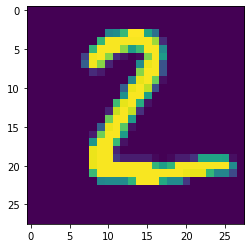

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create Predictions
predictions = network.predict(test_images)

plt.imshow(test_images[1].reshape(28, 28))

In [11]:
np.round(predictions[1])

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)